## Regresión Lineal Simple

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

• Title: Titulo del Artículo

• url: ruta al artículo

• Word count: la cantidad de palabras del artículo,

• # of Links: los enlaces externos que contiene,

• # of comments: cantidad de comentarios,

• # Images video: suma de imágenes (o videos),

• Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)

• # Shares: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.


**Objetivos:** A partir de las características de un artículo de machine learning intentaremos predecir, cuantas veces será compartido en Redes Sociales



In [4]:
data=pd.read_csv("articulos_ml.csv")

In [6]:
data.shape

(161, 8)

In [8]:
data.tail()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660
160,[Log] 87: Google's Cloud Is Eating Apple's Lunch,[Log] 87: http://feedproxy.google.com/~r/Techc...,953,6,13.0,2,88,5956


In [9]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


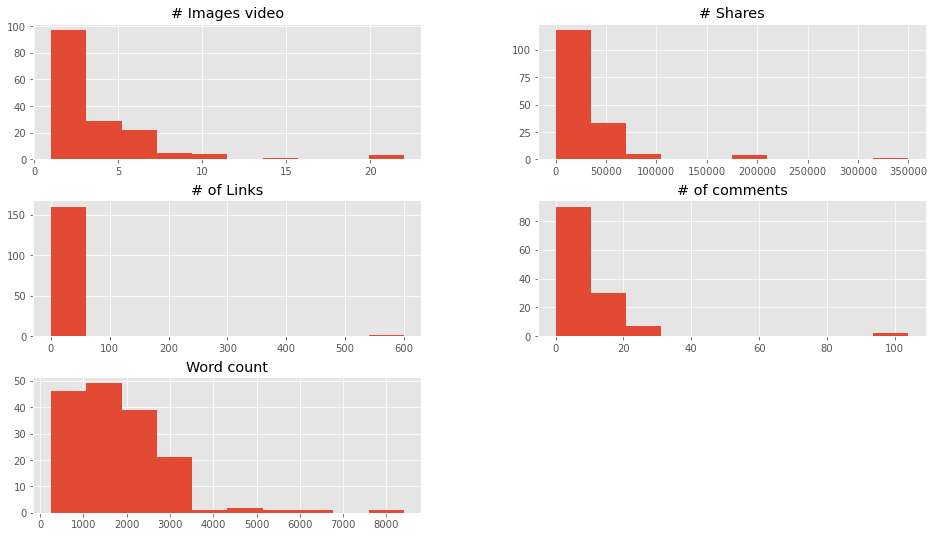

In [15]:
data.drop(["Title","url","Elapsed days"],1).hist()
plt.show()

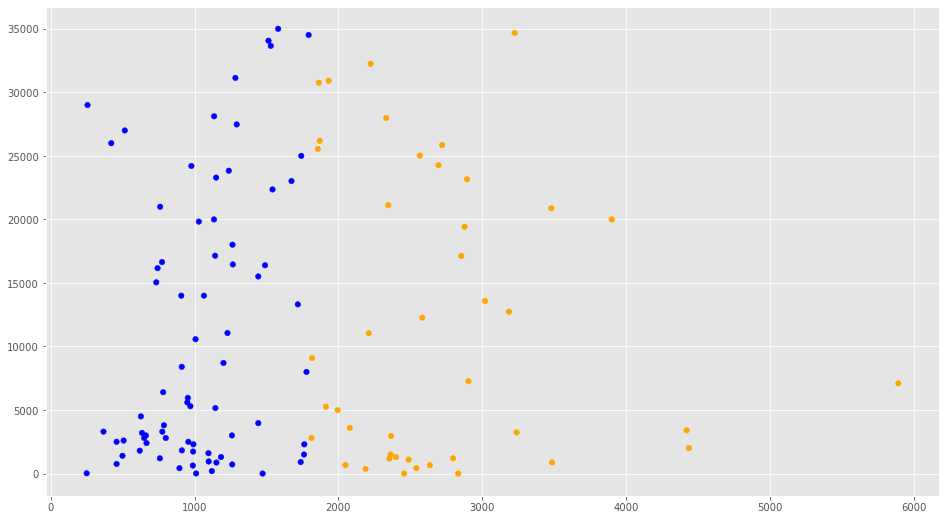

In [24]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data=data[(data["Word count"]<=8000) & (data["# Shares"]<=35000)]

colores=["orange","blue"]
tamano=[30,60]

f1=filtered_data["Word count"].values
f2=filtered_data["# Shares"].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad\

asignar=[]
for index,row in filtered_data.iterrows():
    if (row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamano[0])
plt.show()


### Regresión Lineal con Python y SKLearn


In [29]:
# Asignamos x e Y
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# predicción
y_pred=regr.predict(X_train)

# Coeficientes
print("Coeficientes: \n ", regr.coef_)

# Y
print(" Y:\n ", regr.intercept_)

# Error cuadrado medio
print("MSE:  %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))  

Coeficientes: 
  [0.8254992]
 Y:
  9977.931100194348
MSE:  117604759.58
Variance score: 0.01


## Regresión lineal Multiple 

In [31]:
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) 
        + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values


In [32]:
regr2=linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

 # Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))


Coefficients: 
 [   1.28341662 -154.44668233]
Mean squared error: 115006857.71
Variance score: 0.03


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

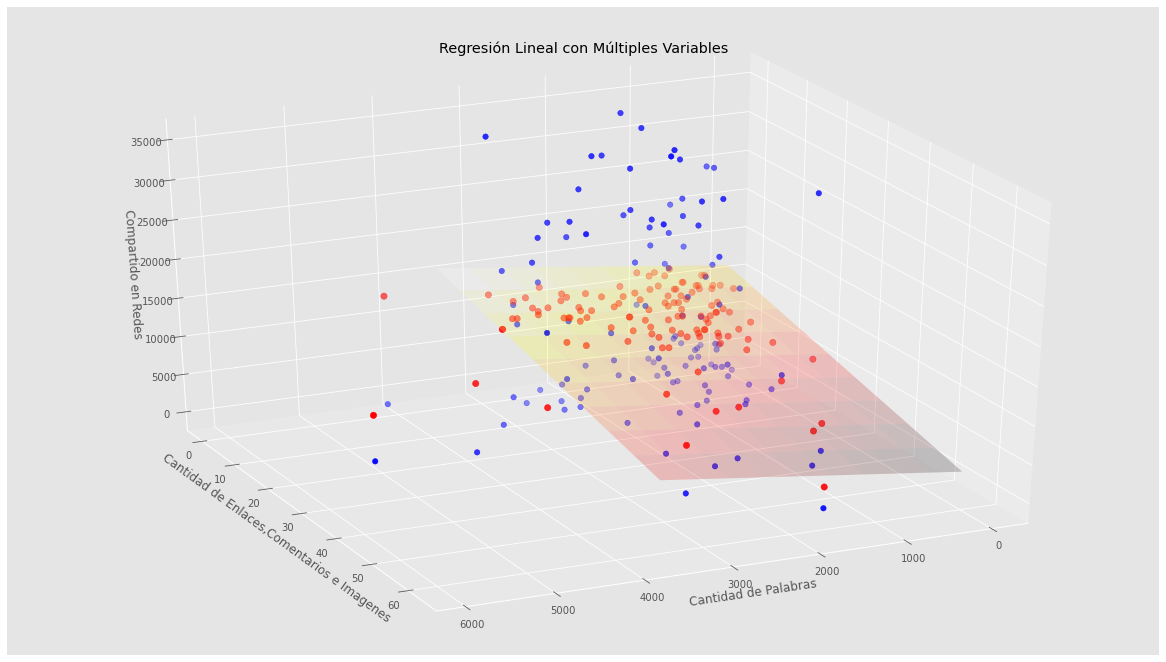

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

 # calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
# Graficamos en rojo, los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')


In [35]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))


11194
